<a href="https://colab.research.google.com/github/EdwSanA/DPro_Tareas/blob/main/Clasificacion_binaria_de_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

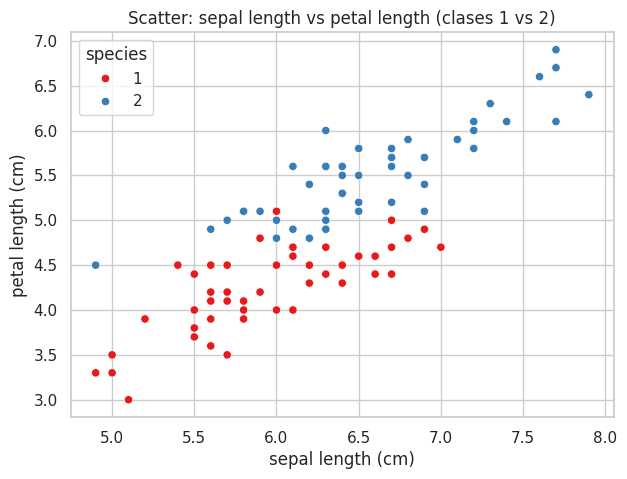

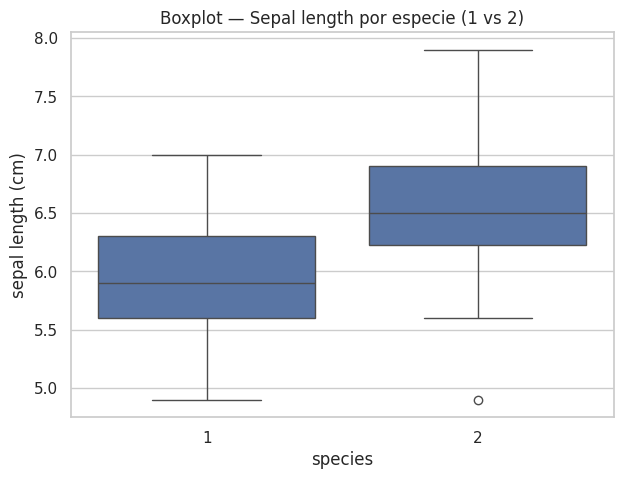

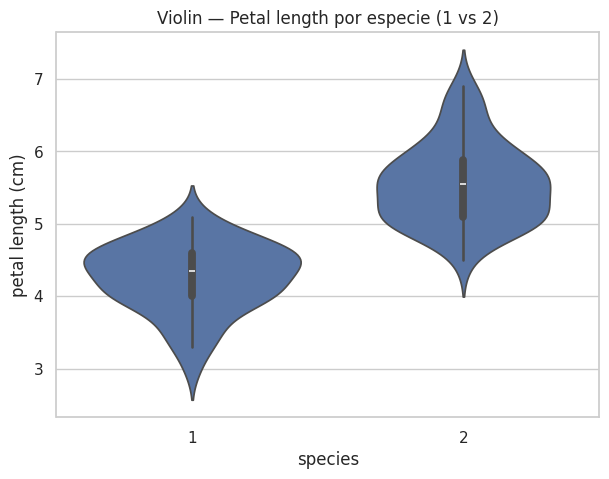


Búsqueda de K para KNN (datos estandarizados):

KNN (k=1) — Reporte
 Accuracy: 0.8400
Precision: 0.8397
   Recall: 0.8397
 F1 Score: 0.8397


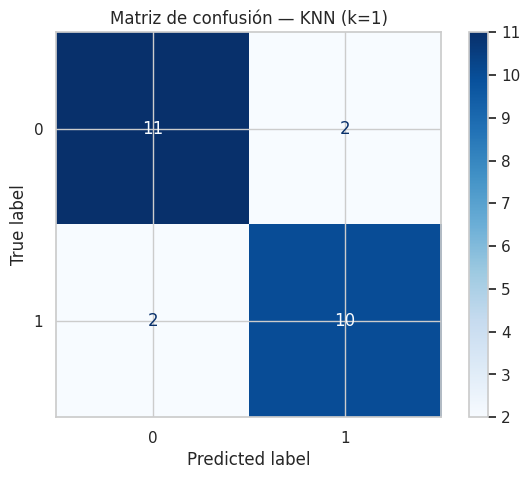


KNN (k=3) — Reporte
 Accuracy: 0.8000
Precision: 0.8167
   Recall: 0.8045
 F1 Score: 0.7987


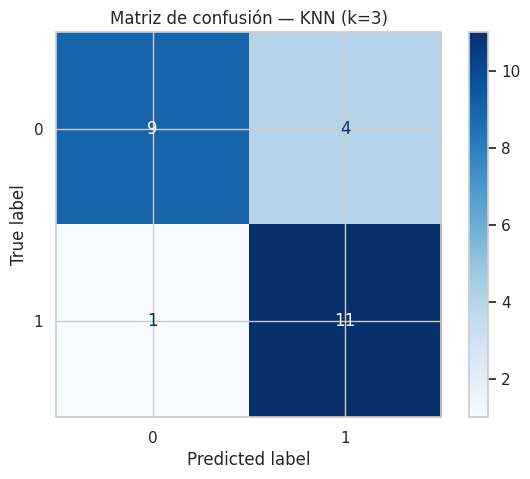


KNN (k=5) — Reporte
 Accuracy: 0.8400
Precision: 0.8474
   Recall: 0.8429
 F1 Score: 0.8397


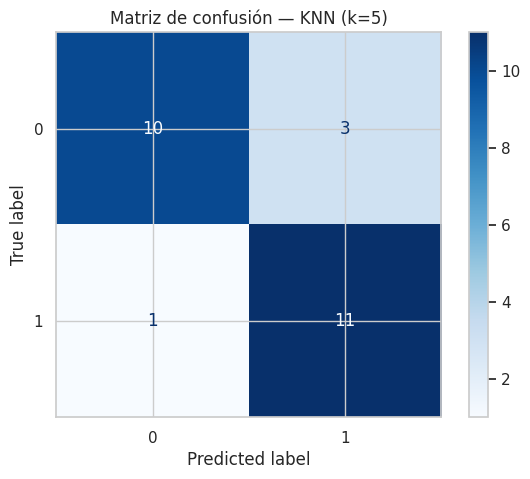


KNN (k=7) — Reporte
 Accuracy: 0.8800
Precision: 0.8814
   Recall: 0.8814
 F1 Score: 0.8800


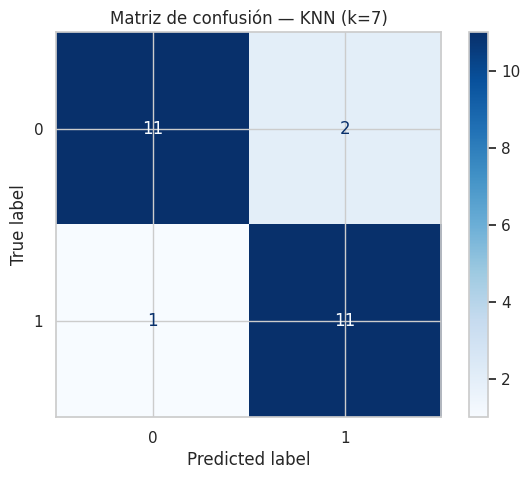


KNN (k=9) — Reporte
 Accuracy: 0.8800
Precision: 0.8814
   Recall: 0.8814
 F1 Score: 0.8800


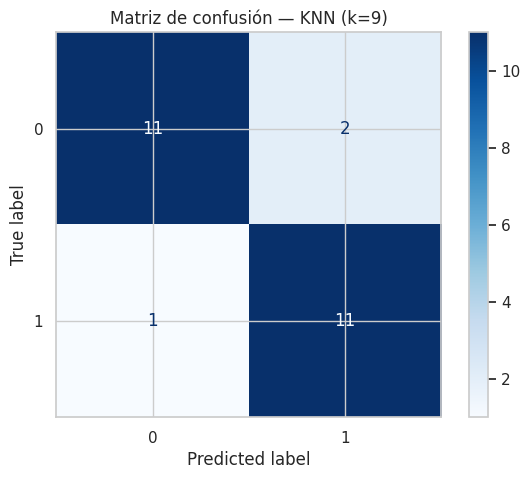

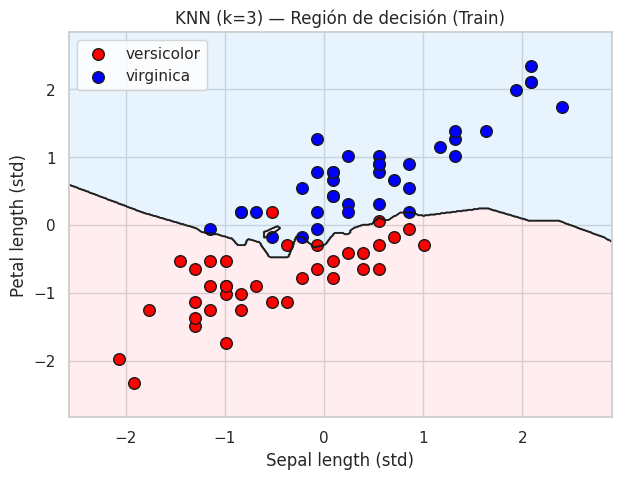

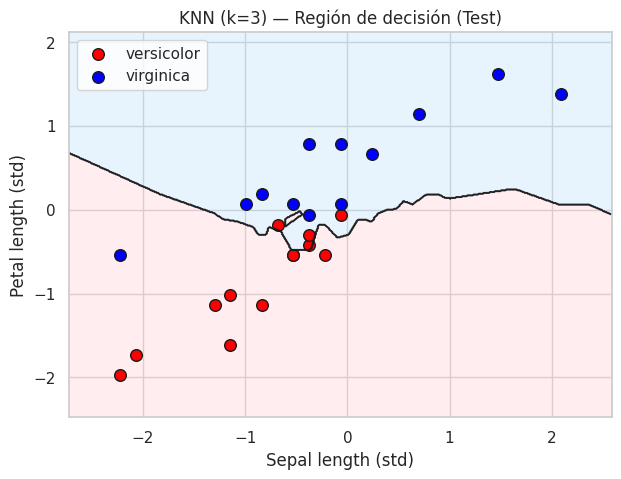


Logistic Regression — Reporte
 Accuracy: 0.9200
Precision: 0.9199
   Recall: 0.9199
 F1 Score: 0.9199


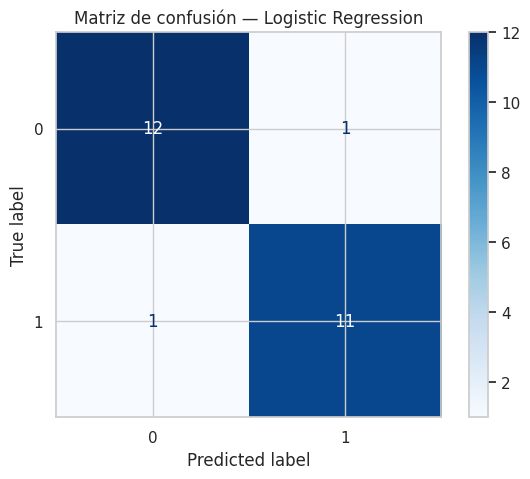

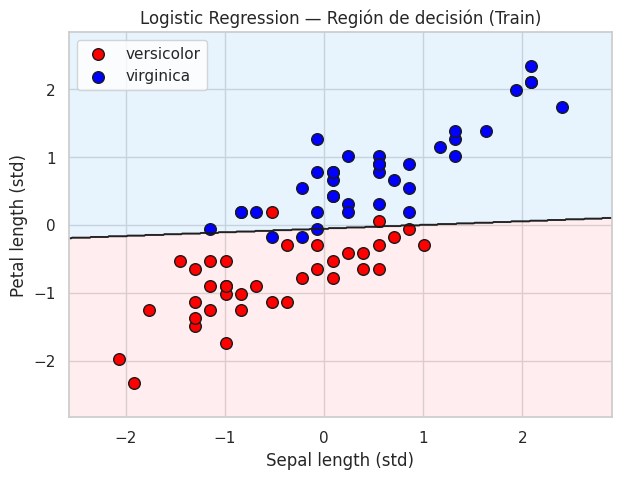


SVM — Reporte
 Accuracy: 0.8800
Precision: 0.8814
   Recall: 0.8814
 F1 Score: 0.8800


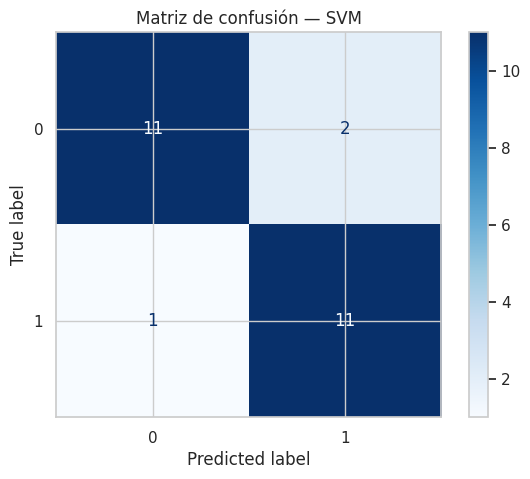

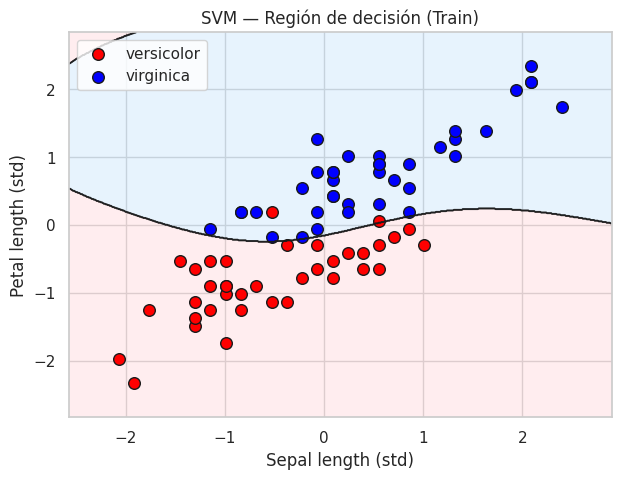


Decision Tree — Reporte
 Accuracy: 0.8400
Precision: 0.8397
   Recall: 0.8397
 F1 Score: 0.8397


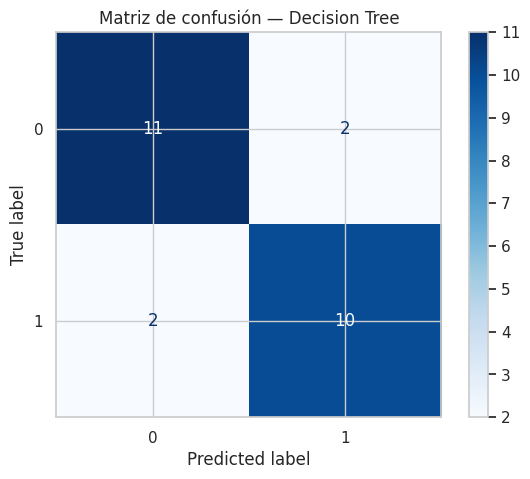

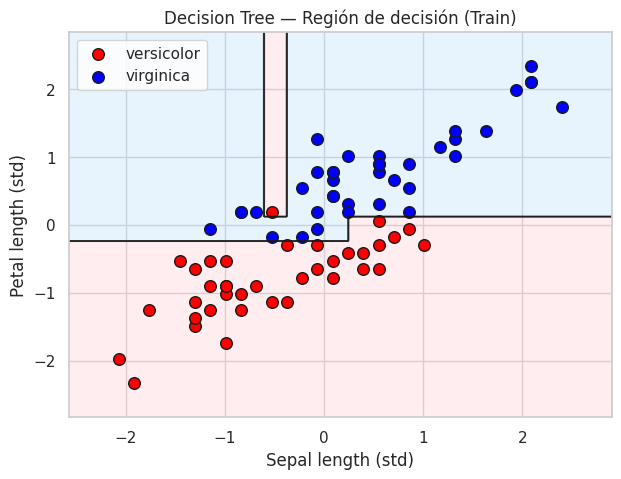


Random Forest — Reporte
 Accuracy: 0.8800
Precision: 0.8814
   Recall: 0.8814
 F1 Score: 0.8800


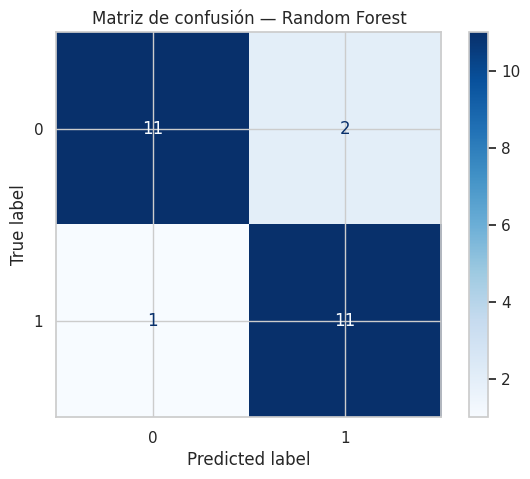

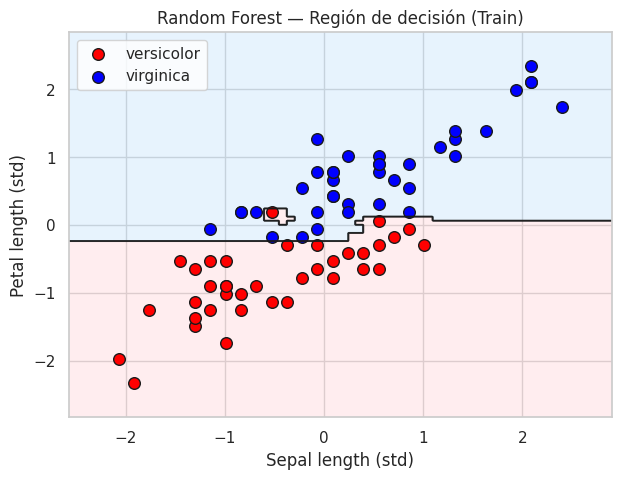


=== Tabla comparativa (con estandarización) ===
                Modelo  Accuracy  Precision    Recall  F1 Score
5  Logistic Regression      0.92   0.919872  0.919872  0.919872
8        Random Forest      0.88   0.881410  0.881410  0.880000
4            KNN (k=9)      0.88   0.881410  0.881410  0.880000
6                  SVM      0.88   0.881410  0.881410  0.880000
3            KNN (k=7)      0.88   0.881410  0.881410  0.880000
0            KNN (k=1)      0.84   0.839744  0.839744  0.839744
2            KNN (k=5)      0.84   0.847403  0.842949  0.839744
7        Decision Tree      0.84   0.839744  0.839744  0.839744
1            KNN (k=3)      0.80   0.816667  0.804487  0.798712

Comparación sin estandarización:

KNN (k=3) (no std) — Reporte
 Accuracy: 0.8400
Precision: 0.8474
   Recall: 0.8429
 F1 Score: 0.8397


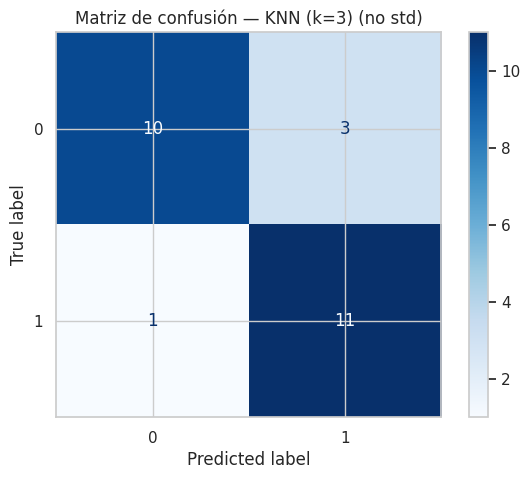


LogReg (no std) — Reporte
 Accuracy: 0.9600
Precision: 0.9643
   Recall: 0.9583
 F1 Score: 0.9597


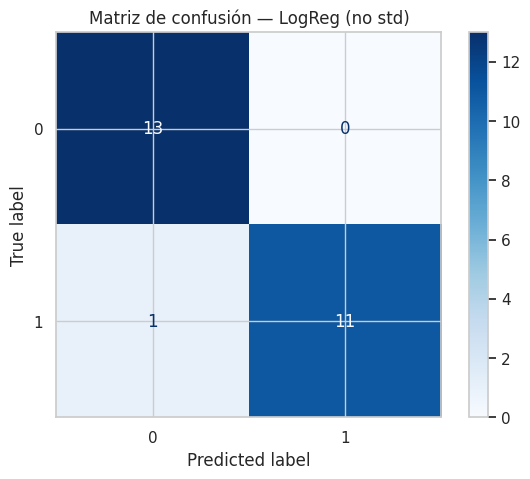


SVM (no std) — Reporte
 Accuracy: 0.8800
Precision: 0.8814
   Recall: 0.8814
 F1 Score: 0.8800


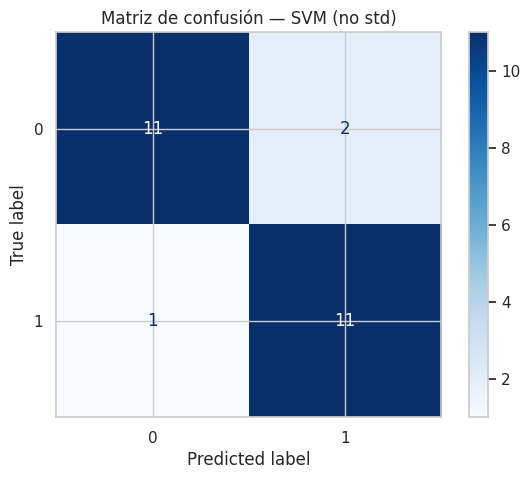


Decision Tree (no std) — Reporte
 Accuracy: 0.8400
Precision: 0.8397
   Recall: 0.8397
 F1 Score: 0.8397


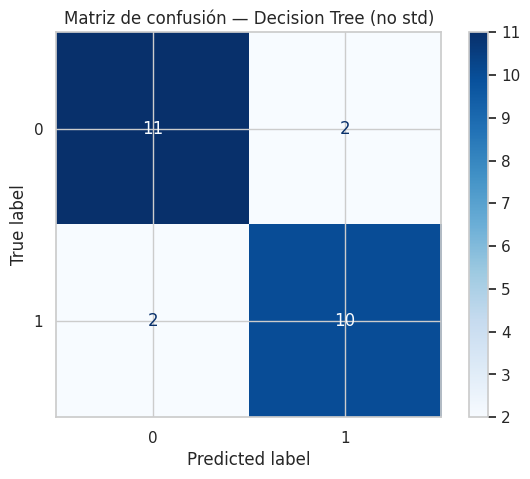


Random Forest (no std) — Reporte
 Accuracy: 0.8800
Precision: 0.8814
   Recall: 0.8814
 F1 Score: 0.8800


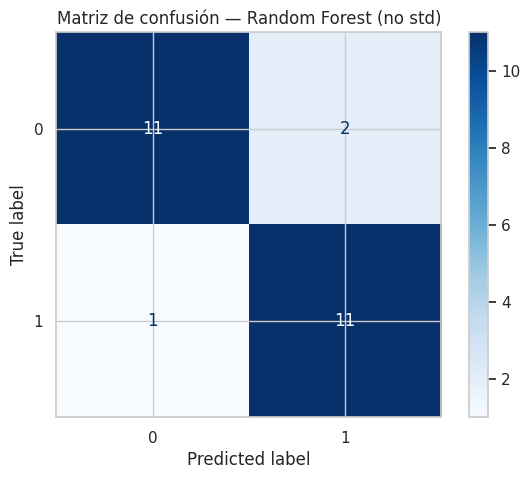


=== Tabla (sin estandarización) ===
                   Modelo  Accuracy  Precision    Recall  F1 Score
1         LogReg (no std)      0.96   0.964286  0.958333  0.959742
4  Random Forest (no std)      0.88   0.881410  0.881410  0.880000
2            SVM (no std)      0.88   0.881410  0.881410  0.880000
0      KNN (k=3) (no std)      0.84   0.847403  0.842949  0.839744
3  Decision Tree (no std)      0.84   0.839744  0.839744  0.839744

LogReg (all) — Reporte
 Accuracy: 0.9211
Precision: 0.9246
   Recall: 0.9231
 F1 Score: 0.9230


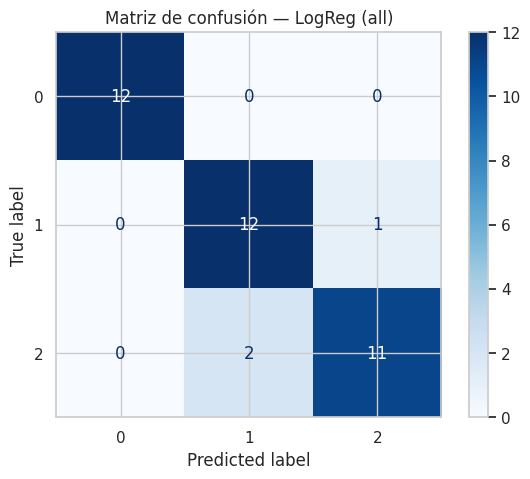


SVM (all) — Reporte
 Accuracy: 0.9474
Precision: 0.9487
   Recall: 0.9487
 F1 Score: 0.9487


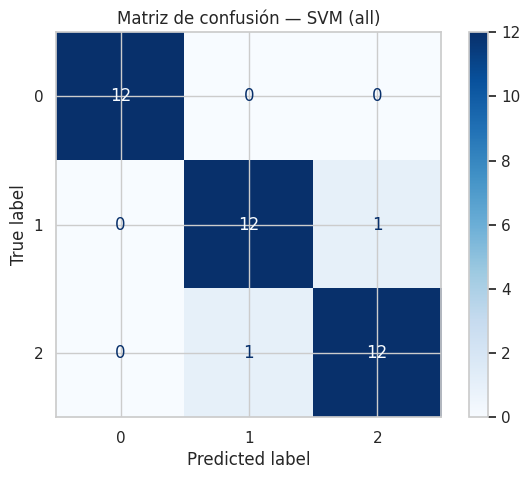


RandomForest (all) — Reporte
 Accuracy: 0.9211
Precision: 0.9246
   Recall: 0.9231
 F1 Score: 0.9230


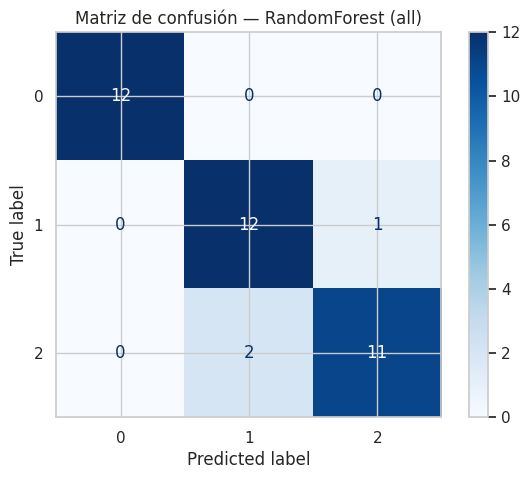


=== Comparativa multiclase (todas las features) ===
               Modelo  Accuracy  Precision    Recall  F1 Score
1           SVM (all)  0.947368   0.948718  0.948718  0.948718
0        LogReg (all)  0.921053   0.924603  0.923077  0.922963
2  RandomForest (all)  0.921053   0.924603  0.923077  0.922963


In [4]:
# ===============================
# Clasificación Binaria de Iris (versión final)
# ===============================

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)

RNG = 42  # Semilla global para reproducibilidad
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (7, 5)


# --------- Utilidades ---------
def decision_region(X, y, model, step=0.01, title="Región de decisión",
                    xlabel="Feature 1", ylabel="Feature 2", target_names=None):
    """Pinta la región de decisión para problemas 2D."""
    # Colores hasta 3 clases (sirve para binario y multiclase simple)
    scatter_color = ["red", "blue", "green"]
    contourf_color = ["#ffcdd2", "#bbdefb", "#c8e6c9"]

    classes = np.unique(y)
    n_class = len(classes)

    f0_min, f0_max = np.min(X[:, 0]) - 0.5, np.max(X[:, 0]) + 0.5
    f1_min, f1_max = np.min(X[:, 1]) - 0.5, np.max(X[:, 1]) + 0.5
    mesh_f0, mesh_f1 = np.meshgrid(np.arange(f0_min, f0_max, step),
                                   np.arange(f1_min, f1_max, step))
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, alpha=0.35,
                 cmap=ListedColormap(contourf_color[:n_class]))
    plt.contour(mesh_f0, mesh_f1, y_pred, colors="k", linewidths=1, alpha=0.4)

    for i, c in enumerate(classes):
        plt.scatter(X[y == c][:, 0], X[y == c][:, 1],
                    s=70, color=scatter_color[i], edgecolor="k",
                    label=(target_names[i] if target_names else str(c)))
    plt.legend()
    plt.show()


def evaluate_model(model, X_train, y_train, X_test, y_test, name="Modelo"):
    """Entrena (si hace falta), predice y muestra métricas + matriz de confusión."""
    # (En este flujo ya llegan entrenados; esto permite reutilizar la función)
    y_pred = model.predict(X_test)
    metrics = {
        "Modelo": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="macro"),
        "Recall": recall_score(y_test, y_pred, average="macro"),
        "F1 Score": f1_score(y_test, y_pred, average="macro")
    }
    print(f"\n{name} — Reporte")
    for k, v in metrics.items():
        if k != "Modelo":
            print(f"{k:>9}: {v:.4f}")
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap="Blues")
    plt.title(f"Matriz de confusión — {name}")
    plt.show()
    return metrics


# --------- [1] Cargar dataset y seleccionar subconjunto/variables ---------
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["species"] = iris.target

# Binario: versicolor (1) vs virginica (2)
df_binary = df[df["species"].isin([1, 2])].copy()
X = df_binary[["sepal length (cm)", "petal length (cm)"]].values
y = df_binary["species"].values  # etiquetas: 1 y 2

# EDA breve
sns.scatterplot(data=df_binary, x="sepal length (cm)", y="petal length (cm)", hue="species", palette="Set1")
plt.title("Scatter: sepal length vs petal length (clases 1 vs 2)")
plt.show()

sns.boxplot(data=df_binary, x="species", y="sepal length (cm)")
plt.title("Boxplot — Sepal length por especie (1 vs 2)")
plt.show()

sns.violinplot(data=df_binary, x="species", y="petal length (cm)")
plt.title("Violin — Petal length por especie (1 vs 2)")
plt.show()


# --------- [2] Split train/test 75/25 con estratificación ---------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=RNG, stratify=y
)

# --------- [3] Estandarización (ajuste en train, transformación en test) ---------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# --------- [4] KNN base + búsqueda de K ---------
print("\nBúsqueda de K para KNN (datos estandarizados):")
res_knn = []
for k in [1, 3, 5, 7, 9]:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_train_scaled, y_train)
    metrics_k = evaluate_model(knn_k, X_train_scaled, y_train, X_test_scaled, y_test, name=f"KNN (k={k})")
    res_knn.append(metrics_k)

# Visualizar región de decisión en TRAIN y TEST para el mejor K (simplemente k=3 como ejemplo)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
decision_region(X_train_scaled, y_train, knn,
                title="KNN (k=3) — Región de decisión (Train)",
                xlabel="Sepal length (std)", ylabel="Petal length (std)",
                target_names=["versicolor", "virginica"])
decision_region(X_test_scaled, y_test, knn,
                title="KNN (k=3) — Región de decisión (Test)",
                xlabel="Sepal length (std)", ylabel="Petal length (std)",
                target_names=["versicolor", "virginica"])


# --------- [5] Comparación de métodos (con estandarización) ---------
models = {
    "Logistic Regression": LogisticRegression(random_state=RNG),
    "SVM": SVC(random_state=RNG, probability=True),
    "Decision Tree": DecisionTreeClassifier(random_state=RNG),
    "Random Forest": RandomForestClassifier(random_state=RNG)
}

results = [m for m in res_knn]  # incluir los KNN probados

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    results.append(evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test, name))

    # Región de decisión sobre TRAIN (2D)
    decision_region(X_train_scaled, y_train, model,
                    title=f"{name} — Región de decisión (Train)",
                    xlabel="Sepal length (std)", ylabel="Petal length (std)",
                    target_names=["versicolor", "virginica"])

results_df = pd.DataFrame(results)
print("\n=== Tabla comparativa (con estandarización) ===")
print(results_df.sort_values("F1 Score", ascending=False))


# --------- [6] Comparación sin estandarizar ---------
print("\nComparación sin estandarización:")
results_no_scaling = []
baseline_models = {
    "KNN (k=3)": KNeighborsClassifier(n_neighbors=3),
    "LogReg": LogisticRegression(random_state=RNG),
    "SVM": SVC(random_state=RNG),
    "Decision Tree": DecisionTreeClassifier(random_state=RNG),
    "Random Forest": RandomForestClassifier(random_state=RNG)
}
for name, model in baseline_models.items():
    model.fit(X_train, y_train)
    results_no_scaling.append(evaluate_model(model, X_train, y_train, X_test, y_test, f"{name} (no std)"))

results_no_scaling_df = pd.DataFrame(results_no_scaling)
print("\n=== Tabla (sin estandarización) ===")
print(results_no_scaling_df.sort_values("F1 Score", ascending=False))


# --------- [7] Clasificación multiclase con TODAS las variables ---------
X_all = df.drop("species", axis=1).values
y_all = df["species"].values  # 0, 1, 2

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X_all, y_all, test_size=0.25, random_state=RNG, stratify=y_all
)

scaler_all = StandardScaler()
X_train_all_scaled = scaler_all.fit_transform(X_train_all)
X_test_all_scaled = scaler_all.transform(X_test_all)

multi_models = {
    "LogReg (all)": LogisticRegression(max_iter=1000, random_state=RNG),
    "SVM (all)": SVC(random_state=RNG),
    "RandomForest (all)": RandomForestClassifier(random_state=RNG)
}

multi_results = []
for name, m in multi_models.items():
    m.fit(X_train_all_scaled, y_train_all)
    multi_results.append(evaluate_model(m, X_train_all_scaled, y_train_all, X_test_all_scaled, y_test_all, name))

multi_results_df = pd.DataFrame(multi_results)
print("\n=== Comparativa multiclase (todas las features) ===")
print(multi_results_df.sort_values("F1 Score", ascending=False))
